# Problem Statement

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [2]:
# Load the Dataset
df=pd.read_csv(r"G:\shipra\Fliprobo internship\global_power_plant.csv")

In [3]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [4]:
# column names
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [5]:
# Checking for the shape of the dataset:

df.shape

(907, 27)

1. There are 907 rows and 27 columns present in the database.
2. There are 2 target columns- primary_fuel and capacity_mw

In [6]:
# checking the datatypes of the dataset
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

Out of total 27 columns, 14 columns are of float datatye and 13 columns are of object datatype.

In [7]:
# Getting general idea about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

Obsservations:
1. 14 out of 27 columns are float datatype.
2. 13 columns are object datatype.
3. The target columns - 'primary_fuel' is of object datatype and 'capacity_mw' is of float datatype.

In [8]:
# Checking for the missing values in the dataset

df.isnull().mean()*100

country                       0.000000
country_long                  0.000000
name                          0.000000
gppd_idnr                     0.000000
capacity_mw                   0.000000
latitude                      5.071665
longitude                     5.071665
primary_fuel                  0.000000
other_fuel1                  78.169791
other_fuel2                  99.889746
other_fuel3                 100.000000
commissioning_year           41.896362
owner                        62.293275
source                        0.000000
url                           0.000000
geolocation_source            2.094818
wepp_id                     100.000000
year_of_capacity_data        42.778390
generation_gwh_2013         100.000000
generation_gwh_2014          56.119074
generation_gwh_2015          53.472988
generation_gwh_2016          52.149945
generation_gwh_2017          51.488423
generation_gwh_2018          50.606395
generation_gwh_2019         100.000000
generation_data_source   

In [9]:
# Dropping country and country_long columns as it contains only 'India' as value.

df = df.drop('country', axis =1)
df = df.drop('country_long', axis =1)

df.head()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


The dataset contains missing values in some columns.

In [10]:
# Dropping the 'other_fuel2' column:

df = df.drop('other_fuel2', axis = 1)
df = df.drop('other_fuel3', axis = 1)
df = df.drop('wepp_id', axis = 1)
df = df.drop('estimated_generation_gwh', axis = 1)
df = df.drop('url', axis = 1)

In [11]:
# checcking the dataset again
df.head()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,WRI,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,WRI,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority


In [12]:
# checking for missing values again
df.isnull().sum()

name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel1               709
commissioning_year        380
owner                     565
source                      0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2013       907
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_gwh_2019       907
generation_data_source    458
dtype: int64

# Handling missing values

1. generation_gwh_2013

In [13]:
# Checking for the mean

df['generation_gwh_2013'].median()



nan

In [14]:
# Replacing the missing values with 0

df['generation_gwh_2013'].fillna(0, inplace=True)

2. generation_gwh_2014

In [15]:
# Checking for the mean

df['generation_gwh_2014'].mean()

# Replacing the missing values

df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].mean(), inplace=True)

3. generation_gwh_2015

In [16]:
# Checking for the mean

df['generation_gwh_2015'].mean()

# Replacing the missing values

df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].mean(), inplace=True)

4. generation_gwh_2016

In [17]:
# Checking for the mean

df['generation_gwh_2016'].mean()

# Replacing the missing values

df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].mean(), inplace=True)

5. generation_gwh_2017

In [18]:
# Checking for the mean

df['generation_gwh_2017'].mean()

# Replacing the missing values

df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].mean(), inplace=True)

6. generation_gwh_2018

In [19]:
# Checking for the mean

df['generation_gwh_2018'].mean()

# Replacing the missing values

df['generation_gwh_2018'].fillna(df['generation_gwh_2018'].mean(), inplace=True)

8. other_fuel1

In [20]:
# Checking for the value counts

df['other_fuel1'].value_counts()

# Replacing the missing values with '0'

df['other_fuel1'].fillna('0', inplace=True)

9. commissioning_year

In [21]:
# Checking the median
df['commissioning_year'].median()

2001.0

In [22]:
# Replacing the missing values

df['commissioning_year'].fillna('2000', inplace=True)

10. latitude

In [23]:
# Checking for the median
df['latitude'].median()

21.78

In [24]:
# Replacing the missing values
df['latitude'].fillna('21.7783', inplace=True)

11. longitude

In [25]:
# Checking for the median
df['longitude'].median()

76.7195

In [26]:
# Replacing the missing values
df['longitude'].fillna('76.7195', inplace=True)

12. year_of_capacity_data

In [27]:
# Checking for the median
df['year_of_capacity_data'].median()

2019.0

In [28]:
# Replacing the missing values
df['year_of_capacity_data'].fillna('2019', inplace=True)

13. owner

In [29]:
# Replacing the missing values
df['owner'].fillna(df.owner.mode(), inplace=True)

13. generation_gwh_2019 

In [30]:
df['generation_gwh_2019'].fillna(0, inplace=True)

In [31]:
# checking the dataset again
df.isnull().sum()

name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
other_fuel1                 0
commissioning_year          0
owner                     565
source                      0
geolocation_source         19
year_of_capacity_data       0
generation_gwh_2013         0
generation_gwh_2014         0
generation_gwh_2015         0
generation_gwh_2016         0
generation_gwh_2017         0
generation_gwh_2018         0
generation_gwh_2019         0
generation_data_source    458
dtype: int64

# Analyzing the target column

In [32]:
# Checking the value counts.

df['primary_fuel'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

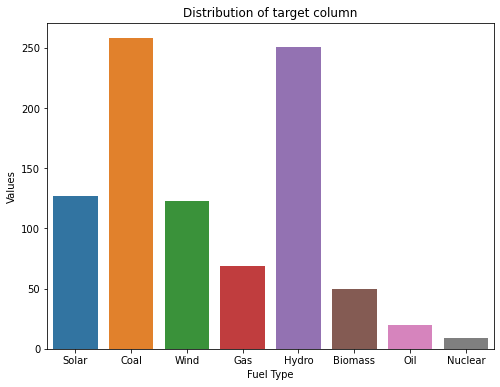

In [33]:
# Plotting graph to show the distribution of target coulmn.

plt.figure(figsize=[8,6])
sns.countplot(x='primary_fuel', data=df)
plt.xlabel('Fuel Type')
plt.ylabel('Values')
plt.title('Distribution of target column')
plt.show()

The target column 'primary_fuel' is imbalanced. 

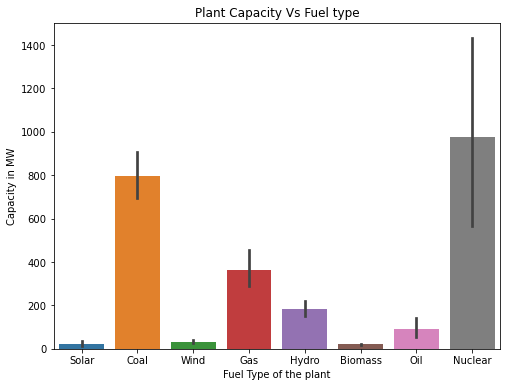

In [34]:
# Checking the distribution of capacity of plants fuel type wise

plt.figure(figsize=[8,6])
sns.barplot(x='primary_fuel', y='capacity_mw', data=df)
plt.xlabel('Fuel Type of the plant')
plt.ylabel('Capacity in MW')
plt.title('Plant Capacity Vs Fuel type')
plt.show()

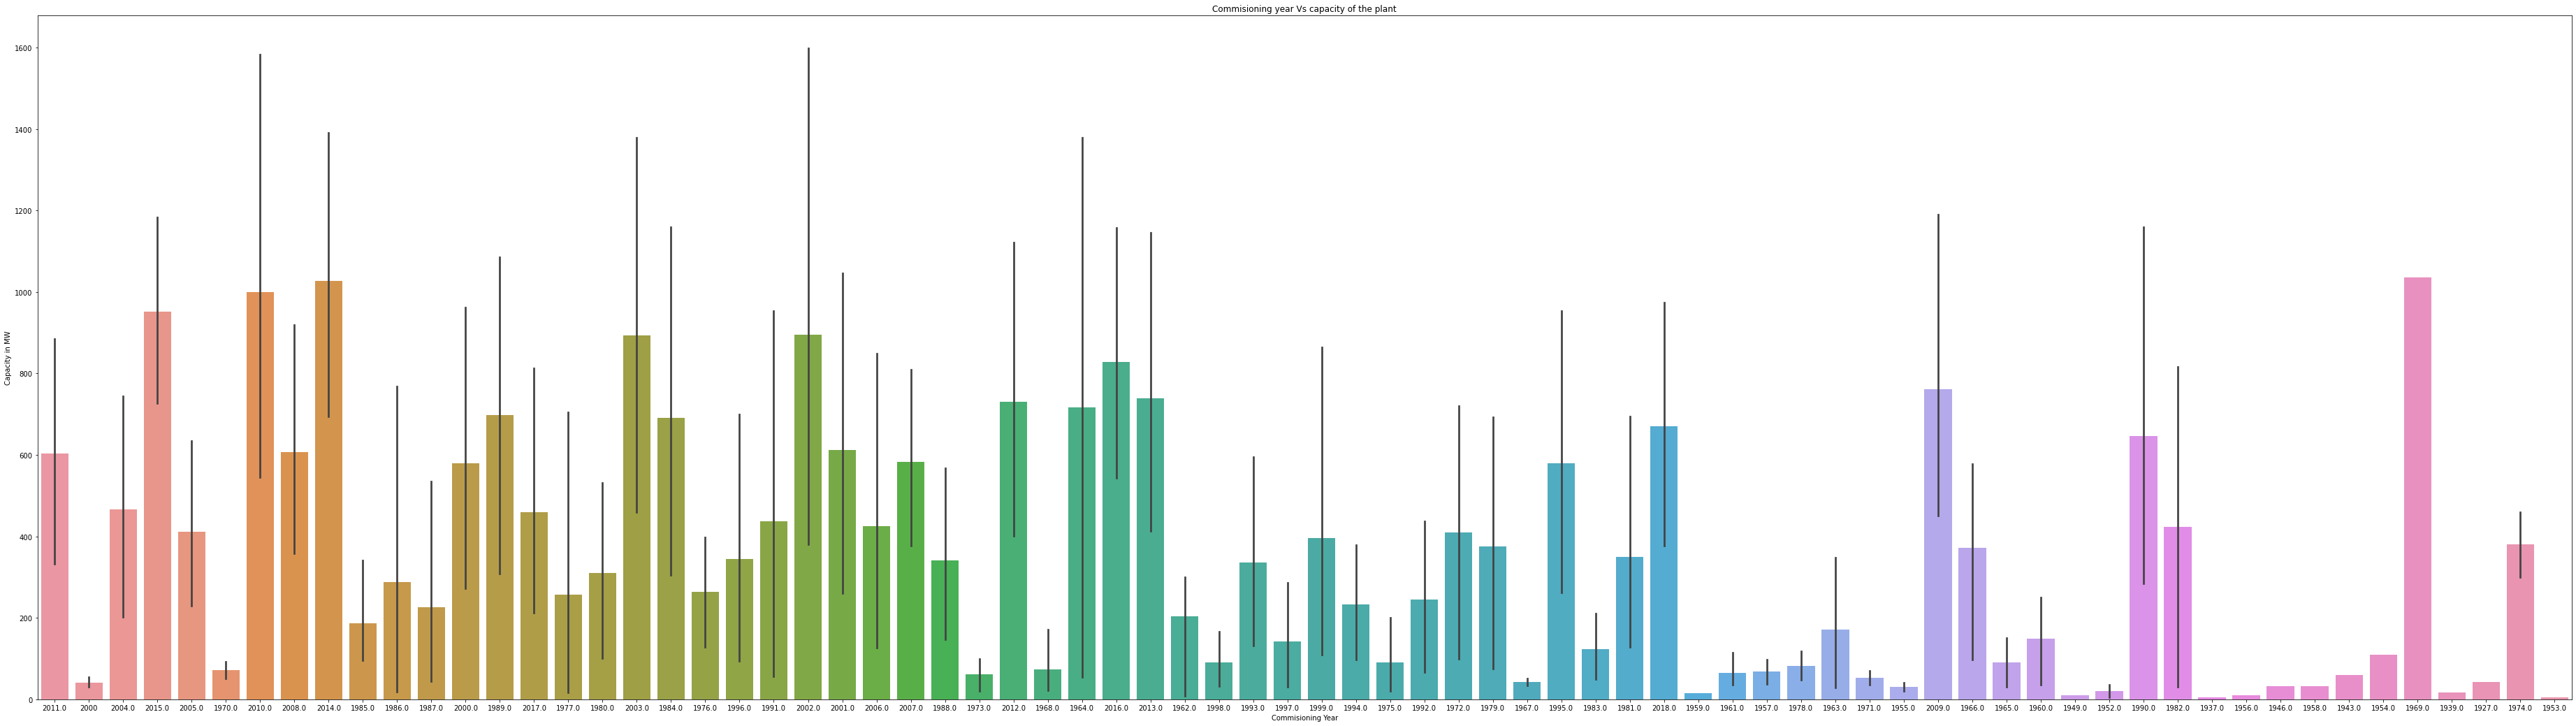

In [35]:
# Checking the distribution of capacity Vs commissioning_year

plt.figure(figsize=[65,18])
sns.barplot(x='commissioning_year', y='capacity_mw', data=df)
plt.xlabel('Commisioning Year')
plt.ylabel('Capacity in MW')
plt.title('Commisioning year Vs capacity of the plant')
plt.show()

The new plants have more capacity than the older plants.

# Label encoding

In [36]:
from sklearn.preprocessing import LabelEncoder

df['name'] = LabelEncoder().fit_transform(df['name'])
df['gppd_idnr'] = LabelEncoder().fit_transform(df['gppd_idnr'])
df['primary_fuel'] = LabelEncoder().fit_transform(df['primary_fuel'])
df['other_fuel1'] = LabelEncoder().fit_transform(df['other_fuel1'])
df['owner'] = LabelEncoder().fit_transform(df['owner'])
df['source'] = LabelEncoder().fit_transform(df['source'])

In [37]:
# Dropping 'geolocation_source' 

df = df.drop('geolocation_source', axis=1)

In [38]:
# Dropping 'generation_data_source'

df = df.drop('generation_data_source', axis=1)

In [39]:
# Checking for the dataset again after label encoding

df.head()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,0,657,2.5,28.1839,73.2407,6,0,2011.0,229,109,2019,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0.0
1,1,519,98.0,24.7663,74.609,1,0,2000,258,174,2019,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0.0
2,2,853,39.2,21.9038,69.3732,7,0,2000,2,21,2019,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0.0
3,3,0,135.0,23.8712,91.3602,2,0,2004.0,280,22,2019.0,0.0,617.789264,843.747000,886.004428,663.774500,626.239128,0.0
4,4,1,1800.0,21.9603,82.4091,1,3,2015.0,280,22,2019.0,0.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0.0


# Checking for the data distribution among all the columns:

LinAlgError: singular matrix

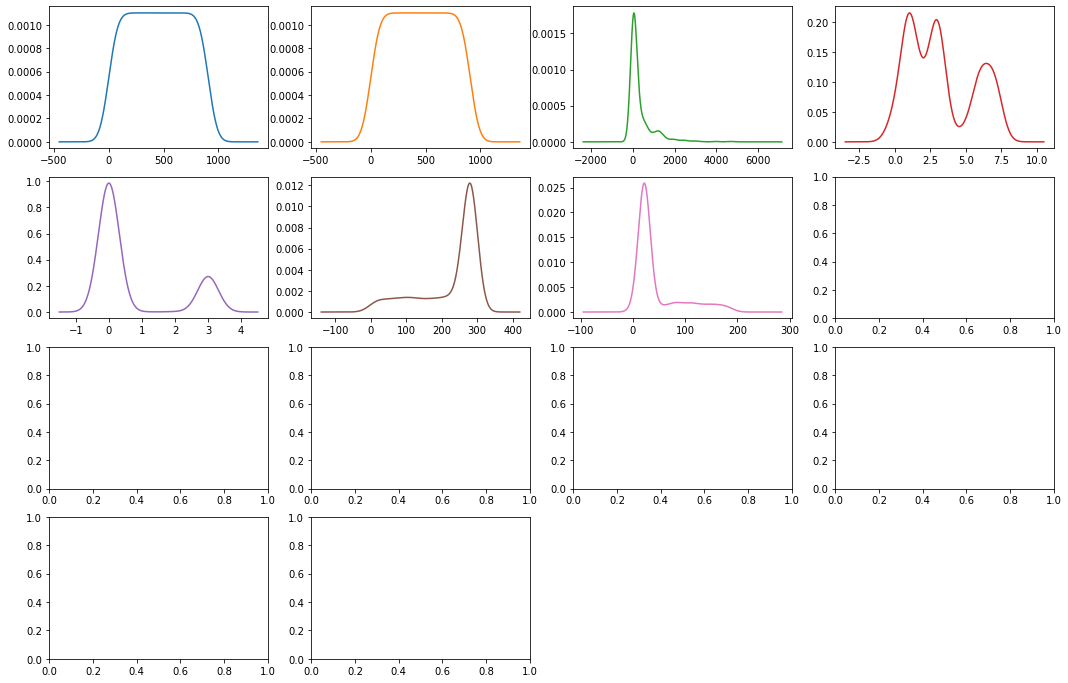

In [40]:
df.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=False, fontsize=1, figsize=[18,12])
plt.show()

# Statistical Summary

In [41]:
df.describe()

,name,gppd_idnr,capacity_mw,primary_fuel,other_fuel1,owner,source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.0,907.000000,907.000000,907.000000,907.000000,907.000000,907.0
mean,453.000000,453.000000,326.223755,3.206174,0.650496,227.476295,43.847850,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0.0
std,261.972645,261.972645,590.085456,2.280652,1.234264,83.924045,44.642818,0.0,2665.338608,2859.349132,2877.890004,2921.502193,3030.808041,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,226.500000,226.500000,16.725000,1.000000,0.000000,188.500000,22.000000,0.0,1211.362750,916.000000,896.500214,882.594850,824.842340,0.0
50%,453.000000,453.000000,59.200000,3.000000,0.000000,280.000000,22.000000,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0.0
75%,679.500000,679.500000,385.250000,6.000000,0.000000,280.000000,29.500000,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0.0
max,906.000000,906.000000,4760.000000,7.000000,3.000000,280.000000,190.000000,0.0,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,0.0


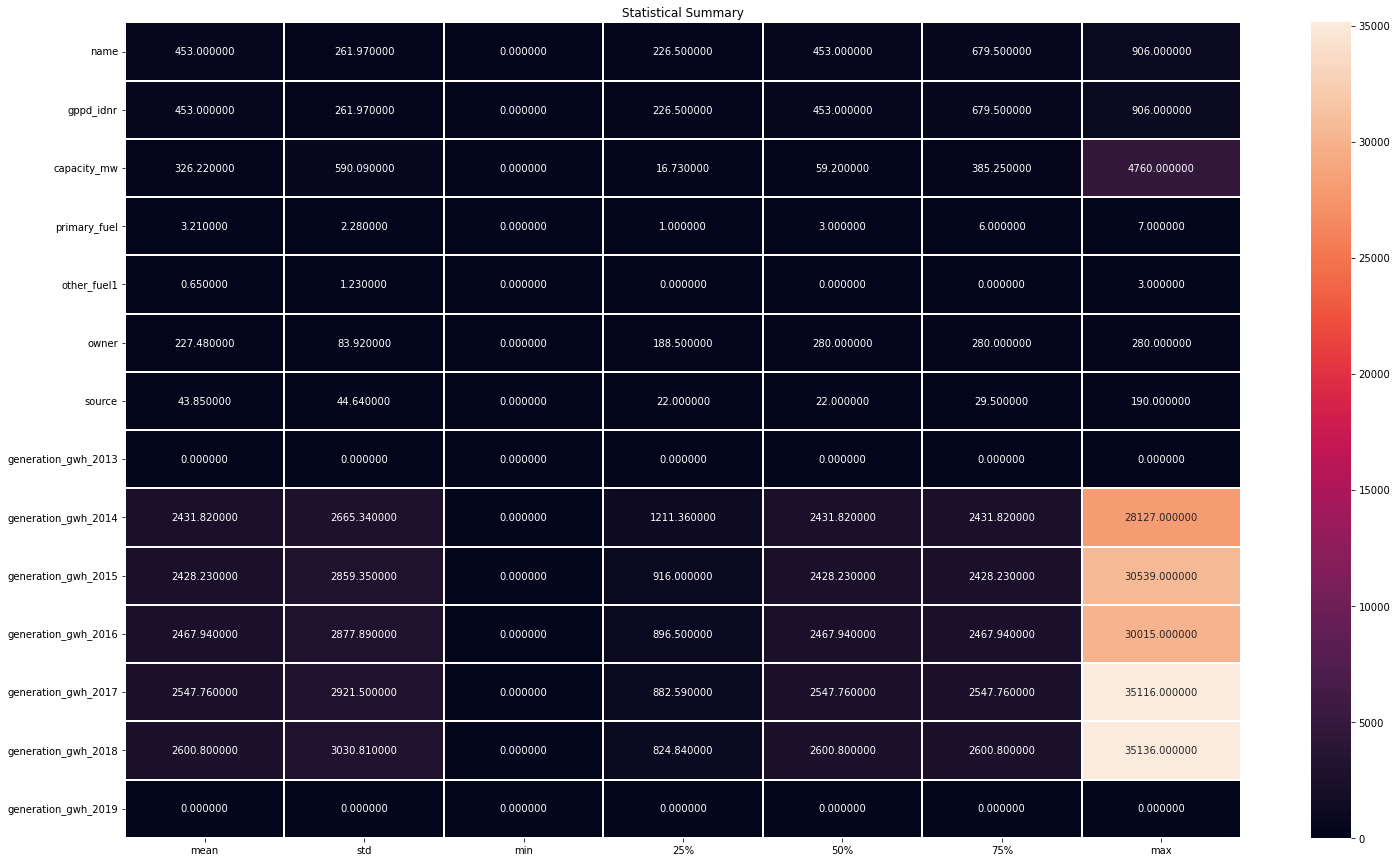

In [42]:
# Plotting Heatmap for Statistical Summary

plt.figure(figsize=[25,15])
sns.heatmap(round(df.describe()[1:].transpose(),2), annot=True, linewidths=0.25, linecolor='white', fmt='f')
plt.title('Statistical Summary')
plt.show()

# Correlation of the variables

In [43]:
df.corr()

,name,gppd_idnr,capacity_mw,primary_fuel,other_fuel1,owner,source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
name,1.000000,0.332205,0.060240,0.040753,0.017051,1.179542e-01,-1.463951e-02,NaN,8.375890e-02,7.366460e-02,6.617668e-02,7.363387e-02,6.663814e-02,NaN
gppd_idnr,0.332205,1.000000,-0.335742,0.609180,-0.382561,-6.020381e-01,4.163838e-01,NaN,4.451808e-02,3.895798e-02,2.683096e-02,2.285274e-02,1.926543e-02,NaN
capacity_mw,0.060240,-0.335742,1.000000,-0.380395,0.633525,3.043221e-01,-2.421218e-01,NaN,6.943503e-01,7.111899e-01,7.422211e-01,7.575852e-01,7.734556e-01,NaN
primary_fuel,0.040753,0.609180,-0.380395,1.000000,-0.495875,-2.603893e-01,5.361263e-02,NaN,-1.247688e-01,-1.248280e-01,-1.310514e-01,-1.320034e-01,-1.369831e-01,NaN
other_fuel1,0.017051,-0.382561,0.633525,-0.495875,1.000000,3.302058e-01,-2.582099e-01,NaN,3.595285e-01,3.559597e-01,3.753686e-01,3.855536e-01,3.908876e-01,NaN
owner,0.117954,-0.602038,0.304322,-0.260389,0.330206,1.000000e+00,-2.435874e-01,NaN,-2.743044e-16,-9.981670e-17,-2.334202e-17,8.369181e-17,-6.497742e-17,NaN
source,-0.014640,0.416384,-0.242122,0.053613,-0.258210,-2.435874e-01,1.000000e+00,NaN,1.917854e-18,-2.160931e-17,-4.925637e-17,-1.284552e-16,1.092118e-17,NaN
generation_gwh_2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2014,0.083759,0.044518,0.694350,-0.124769,0.359529,-2.743044e-16,1.917854e-18,NaN,1.000000e+00,9.535943e-01,9.258738e-01,8.916868e-01,8.849556e-01,NaN
generation_gwh_2015,0.073665,0.038958,0.711190,-0.124828,0.355960,-9.981670e-17,-2.160931e-17,NaN,9.535943e-01,1.000000e+00,9.688877e-01,9.282425e-01,9.234611e-01,NaN


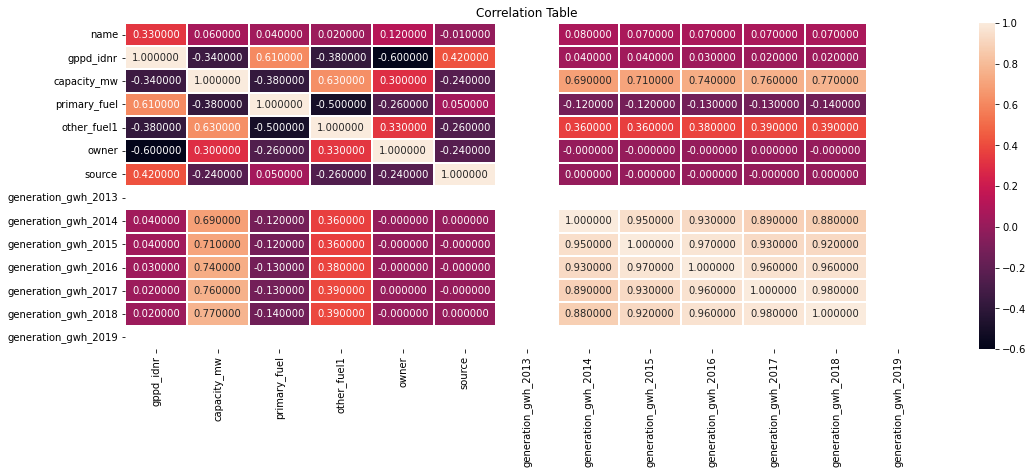

In [44]:
# Plotting heatmap for the correlation table

plt.figure(figsize=[18,6])
sns.heatmap(round(df.corr()[1:].transpose(),2), annot=True, linewidths=0.25, linecolor='white', fmt='f')
plt.title('Correlation Table')
plt.show()


In [45]:
# dropping the columns which are not contributing to the dataset

df = df.drop('other_fuel1', axis=1)
df = df.drop('year_of_capacity_data', axis=1)

# Checking for outliers and skewness:

In [46]:
# 'primary_fuel' as target variable:
x = df.drop(['primary_fuel'],axis=1)
y = df['primary_fuel']

In [47]:
# 'capacity_mw' as target variable:

x1 = df.drop(['capacity_mw'], axis=1)
y1 = df['capacity_mw']

In [48]:
#cheking for skewness in x

x.skew()

name                   0.000000
gppd_idnr              0.000000
capacity_mw            3.123576
latitude              -0.164110
longitude              1.163320
commissioning_year    -1.650210
owner                 -1.373940
source                 1.827373
generation_gwh_2013    0.000000
generation_gwh_2014    5.035446
generation_gwh_2015    5.364134
generation_gwh_2016    5.068427
generation_gwh_2017    5.110952
generation_gwh_2018    4.937907
generation_gwh_2019    0.000000
dtype: float64

# Remove the skewness

In [49]:
# Removing skewness from 'x'
from sklearn.preprocessing import power_transform

df_new = power_transform(x)

df_new = pd.DataFrame(df_new, columns=x.columns)

df_new.skew()

name                  -0.288179
gppd_idnr             -0.288179
capacity_mw            0.022164
latitude              -0.076539
longitude              0.002675
commissioning_year    -0.409198
owner                 -1.025314
source                -0.214066
generation_gwh_2013    0.000000
generation_gwh_2014    0.123226
generation_gwh_2015    0.074582
generation_gwh_2016    0.041821
generation_gwh_2017    0.018337
generation_gwh_2018    0.000783
generation_gwh_2019    0.000000
dtype: float64

# Standard Scaler

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[-1.73014221e+00,  7.79136890e-01, -5.48907549e-01, ...,
        -1.55741196e-16,  1.50124402e-16,  0.00000000e+00],
       [-1.72632291e+00,  2.52073700e-01, -3.86977292e-01, ...,
        -1.55741196e-16,  1.50124402e-16,  0.00000000e+00],
       [-1.72250361e+00,  1.52771939e+00, -4.86678853e-01, ...,
        -1.55741196e-16,  1.50124402e-16,  0.00000000e+00],
       ...,
       [ 1.72250361e+00,  1.67285273e+00, -5.09908639e-01, ...,
        -1.55741196e-16,  1.50124402e-16,  0.00000000e+00],
       [ 1.72632291e+00,  3.28459669e-01, -4.17498178e-01, ...,
        -1.55741196e-16,  1.50124402e-16,  0.00000000e+00],
       [ 1.73014221e+00,  1.61556326e+00, -5.25169082e-01, ...,
        -1.55741196e-16,  1.50124402e-16,  0.00000000e+00]])

# Handling data imbalance done by oversampling:

In [51]:
from imblearn.over_sampling import SMOTE
Sm = SMOTE()
x_over, y_over = Sm.fit_resample(x,y)

In [52]:
y_over.value_counts()

6    258
1    258
7    258
2    258
3    258
0    258
5    258
4    258
Name: primary_fuel, dtype: int64

# Model Training

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.30, random_state=212)

# LogisticRegression:

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
lr = LogisticRegression()
lr.fit(x_train,y_train)
predlr = lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.7661290322580645
[[82  0  0  0  0  5  0  0]
 [11 36  7  4 10  3  1  0]
 [ 7  4 39 11  7 13  0  0]
 [ 0  7  8 45  3 12  0  0]
 [ 0  0  0  5 66  0  0  0]
 [14  0  0  7  0 51  0  0]
 [ 1  0  0  0  0  0 73  4]
 [ 0  0  0  0  0  0  1 83]]
              precision    recall  f1-score   support

           0       0.71      0.94      0.81        87
           1       0.77      0.50      0.61        72
           2       0.72      0.48      0.58        81
           3       0.62      0.60      0.61        75
           4       0.77      0.93      0.84        71
           5       0.61      0.71      0.65        72
           6       0.97      0.94      0.95        78
           7       0.95      0.99      0.97        84

    accuracy                           0.77       620
   macro avg       0.77      0.76      0.75       620
weighted avg       0.77      0.77      0.76       620



# RandomForestClassifier:

In [55]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(x_train, y_train)
predRF = RF.predict(x_test)
print(accuracy_score(y_test, predRF))
print(confusion_matrix(y_test, predRF))
print(classification_report(y_test, predRF))

0.9193548387096774
[[87  0  0  0  0  0  0  0]
 [ 8 49  6  3  4  2  0  0]
 [ 1  1 71  4  0  4  0  0]
 [ 0  5  7 61  2  0  0  0]
 [ 0  0  0  0 71  0  0  0]
 [ 2  0  0  0  0 70  0  0]
 [ 0  0  0  0  0  0 77  1]
 [ 0  0  0  0  0  0  0 84]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        87
           1       0.89      0.68      0.77        72
           2       0.85      0.88      0.86        81
           3       0.90      0.81      0.85        75
           4       0.92      1.00      0.96        71
           5       0.92      0.97      0.95        72
           6       1.00      0.99      0.99        78
           7       0.99      1.00      0.99        84

    accuracy                           0.92       620
   macro avg       0.92      0.92      0.91       620
weighted avg       0.92      0.92      0.92       620



# DecisionTreeClassifier

In [56]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt = dt.predict(x_test)
print(accuracy_score(y_test, preddt))
print(confusion_matrix(y_test, preddt))
print(classification_report(y_test, preddt))

0.8838709677419355
[[85  1  1  0  0  0  0  0]
 [ 6 49  4  4  6  3  0  0]
 [ 1  8 61  6  0  5  0  0]
 [ 0  9  6 55  2  3  0  0]
 [ 0  0  0  0 71  0  0  0]
 [ 1  0  3  2  0 66  0  0]
 [ 0  0  0  0  0  0 77  1]
 [ 0  0  0  0  0  0  0 84]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94        87
           1       0.73      0.68      0.71        72
           2       0.81      0.75      0.78        81
           3       0.82      0.73      0.77        75
           4       0.90      1.00      0.95        71
           5       0.86      0.92      0.89        72
           6       1.00      0.99      0.99        78
           7       0.99      1.00      0.99        84

    accuracy                           0.88       620
   macro avg       0.88      0.88      0.88       620
weighted avg       0.88      0.88      0.88       620



# K-Nearest Neighbors:

In [57]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
predknn = knn.predict(x_test)

print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test,predknn))

0.8403225806451613
[[86  1  0  0  0  0  0  0]
 [11 37  7  4  8  3  2  0]
 [ 4  1 68  3  0  5  0  0]
 [ 0  7 11 43  1 12  0  1]
 [ 0  0  0  0 71  0  0  0]
 [ 5  0  3  0  0 64  0  0]
 [ 5  2  0  0  0  1 68  2]
 [ 0  0  0  0  0  0  0 84]]
              precision    recall  f1-score   support

           0       0.77      0.99      0.87        87
           1       0.77      0.51      0.62        72
           2       0.76      0.84      0.80        81
           3       0.86      0.57      0.69        75
           4       0.89      1.00      0.94        71
           5       0.75      0.89      0.82        72
           6       0.97      0.87      0.92        78
           7       0.97      1.00      0.98        84

    accuracy                           0.84       620
   macro avg       0.84      0.83      0.83       620
weighted avg       0.84      0.84      0.83       620



# cross validation score:

In [58]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(lr,x,y,cv=5)
print('Cross validation score for LogisticRegression is ',scr.mean())


scr = cross_val_score(RF,x,y,cv=5)
print('Cross validation score for RandomForest is', scr.mean())

scr = cross_val_score(dt,x,y,cv=5)
print('Cross validation score for DecisionTree is ', scr.mean())

scr = cross_val_score(knn,x,y,cv=5)
print('Cross validation score for K-Nearest Neighbors is', scr.mean())

Cross validation score for LogisticRegression is  0.7618723817618844
Cross validation score for RandomForest is 0.8533725942565722
Cross validation score for DecisionTree is  0.7773966365126587
Cross validation score for K-Nearest Neighbors is 0.7386861757027503


# Hyper parameter tuning:

In [59]:
from sklearn.model_selection import GridSearchCV

#Defining parameters

params = {'random_state' : [5,7,9,11,13,15],
          'max_iter':[1,10,50,100]}

GCV=GridSearchCV(lr,params, verbose = 1, cv=3)

In [60]:
GCV.fit(x_train,y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'max_iter': [1, 10, 50, 100],
                         'random_state': [5, 7, 9, 11, 13, 15]},
             verbose=1)

In [61]:
# Finding the best parameter found by GridSearchCV

GCV.best_params_

{'max_iter': 50, 'random_state': 5}

In [62]:
model1 = LogisticRegression(max_iter = 100, random_state = 5)
model1.fit(x_train, y_train)
pred1 = model1.predict(x_test)

print(accuracy_score(y_test,pred1)*100)
print(classification_report(y_test,pred1))

76.61290322580645
              precision    recall  f1-score   support

           0       0.71      0.94      0.81        87
           1       0.77      0.50      0.61        72
           2       0.72      0.48      0.58        81
           3       0.62      0.60      0.61        75
           4       0.77      0.93      0.84        71
           5       0.61      0.71      0.65        72
           6       0.97      0.94      0.95        78
           7       0.95      0.99      0.97        84

    accuracy                           0.77       620
   macro avg       0.77      0.76      0.75       620
weighted avg       0.77      0.77      0.76       620



# Model Saving

In [63]:
import pickle
filename = 'global_power_plant_fueltype.pkl'
pickle.dump(model1, open(filename, 'wb'))

# Conclusion

In [64]:
a = np.array(y_test)
predicted = np.array(model1.predict(x_test))
df_conclusion = pd.DataFrame({"Original":a, "Predicted":predicted}, index=range(len(a)))

df_conclusion

,Original,Predicted
0,1,1
1,6,6
2,6,6
3,7,7
4,4,4
...,...,...
615,3,2
616,4,4
617,2,5
618,6,0


# prediction of  the capacity_mw

In [65]:
#checking for the skewness in the x1.

x1.skew()

name                   0.000000
gppd_idnr              0.000000
latitude              -0.164110
longitude              1.163320
primary_fuel           0.472251
commissioning_year    -1.650210
owner                 -1.373940
source                 1.827373
generation_gwh_2013    0.000000
generation_gwh_2014    5.035446
generation_gwh_2015    5.364134
generation_gwh_2016    5.068427
generation_gwh_2017    5.110952
generation_gwh_2018    4.937907
generation_gwh_2019    0.000000
dtype: float64

In [66]:
# Removing the skewness using power_transform technique

from sklearn.preprocessing import power_transform

df_new1 = power_transform(x1)

df_new1 = pd.DataFrame(df_new1, columns=x1.columns)

df_new1.skew()

name                  -0.288179
gppd_idnr             -0.288179
latitude              -0.076539
longitude              0.002675
primary_fuel          -0.047067
commissioning_year    -0.409198
owner                 -1.025314
source                -0.214066
generation_gwh_2013    0.000000
generation_gwh_2014    0.123226
generation_gwh_2015    0.074582
generation_gwh_2016    0.041821
generation_gwh_2017    0.018337
generation_gwh_2018    0.000783
generation_gwh_2019    0.000000
dtype: float64

# Standard Scaler

In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x1 = scaler.fit_transform(x1)
x1

array([[-1.73014221e+00,  7.79136890e-01,  1.14470912e+00, ...,
        -1.55741196e-16,  1.50124402e-16,  0.00000000e+00],
       [-1.72632291e+00,  2.52073700e-01,  5.82338454e-01, ...,
        -1.55741196e-16,  1.50124402e-16,  0.00000000e+00],
       [-1.72250361e+00,  1.52771939e+00,  1.11310238e-01, ...,
        -1.55741196e-16,  1.50124402e-16,  0.00000000e+00],
       ...,
       [ 1.72250361e+00,  1.67285273e+00, -9.79336056e-01, ...,
        -1.55741196e-16,  1.50124402e-16,  0.00000000e+00],
       [ 1.72632291e+00,  3.28459669e-01,  5.13835731e-01, ...,
        -1.55741196e-16,  1.50124402e-16,  0.00000000e+00],
       [ 1.73014221e+00,  1.61556326e+00, -1.85827059e+00, ...,
        -1.55741196e-16,  1.50124402e-16,  0.00000000e+00]])

# Model Training

In [68]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=42)

# 1. LinerRegression:

In [69]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression( fit_intercept = True)

LR.fit(x1_train, y1_train)
print(f"Linear coefficients : {LR.coef_}")
print(f"Intercept : {LR.intercept_}")

y1_pred = LR.predict(x1_test)
y1_pred

Linear coefficients : [ 3.54165405e+01 -9.94323128e+01  4.04882602e+00 -1.73460168e+01
 -7.33856730e+01  8.84223941e+01  8.86147661e+01 -8.98054903e+01
  1.98951966e-13  1.01531857e+02 -1.23312615e+02  7.04131192e+01
 -4.91489782e+01  4.43599026e+02  0.00000000e+00]
Intercept : 329.27489819835415


array([ 3.37172946e+02,  2.03365164e+02, -1.29416258e+02,  1.21926128e+02,
        4.47354625e+02,  2.72030352e+02, -7.93325503e+01, -6.53993079e+01,
        4.60569176e+02,  1.98476541e+02,  2.16184332e+02,  2.80864111e+02,
       -1.53908462e+02,  1.18064797e+02,  1.32417485e+02,  1.05131713e+02,
       -4.00691035e+01,  3.56491922e+02,  7.19236490e+02,  2.20181387e+02,
       -9.03691026e+01, -4.50740933e+01, -1.54560194e+02,  2.85373919e+02,
        1.84869046e+02,  6.35579648e+01,  1.05848581e+03, -4.42402799e+01,
       -1.55138178e+02,  2.26522659e+02,  3.08589188e+02,  3.25441085e+02,
        4.14604673e+02,  6.24673589e+02,  2.90731307e+02, -6.37647195e+01,
       -1.11852469e+02,  2.82066329e+02,  4.85967678e+02,  1.22601308e+02,
        1.64272211e+02,  4.01079276e+02,  4.94581525e+02,  2.41866004e+02,
        1.09084852e+02,  7.35940561e+02,  2.59812505e+02,  1.36092279e+02,
        4.40716044e+02, -1.37157569e+01,  1.45092029e+02,  4.84022675e+02,
        8.86149835e+01,  

# 2. Ridge Regression:

In [70]:
# Importing the library
from sklearn.linear_model import Ridge

rid = Ridge(alpha=0.5)
rid.fit(x1_train,y1_train)

print(f"Ridge Coefficients : {rid.coef_}")
print(f"Intercept : {rid.intercept_}")

rid_pred = rid.predict(x1_test)

rid_pred

Ridge Coefficients : [  35.29220026  -99.37398511    4.05856061  -17.31228674  -73.41281631
   88.41009729   88.57483541  -89.75183099    0.           99.68061717
 -119.3402955    68.04757928  -39.78797344  434.3491975     0.        ]
Intercept : 329.2348611615667


array([ 3.36904903e+02,  2.03264530e+02, -1.29362338e+02,  1.20949442e+02,
        4.47103346e+02,  2.71746741e+02, -7.94329887e+01, -6.52866414e+01,
        4.59190070e+02,  1.98538647e+02,  2.16227751e+02,  2.80715671e+02,
       -1.53656199e+02,  1.18339515e+02,  1.32331854e+02,  1.05011778e+02,
       -3.98727630e+01,  3.54829791e+02,  7.11104157e+02,  2.20052626e+02,
       -9.02090804e+01, -4.49655938e+01, -1.54267549e+02,  2.85582539e+02,
        1.84963754e+02,  6.35144237e+01,  1.05876389e+03, -4.42416327e+01,
       -1.55073215e+02,  2.26485680e+02,  3.08888117e+02,  3.25673202e+02,
        4.18023225e+02,  6.21017694e+02,  2.88860962e+02, -6.31614917e+01,
       -1.11718915e+02,  2.85120818e+02,  4.85848178e+02,  1.22744460e+02,
        1.64438830e+02,  4.01163830e+02,  4.95399593e+02,  2.41844259e+02,
        1.08920182e+02,  7.32027602e+02,  2.57405307e+02,  1.36405932e+02,
        4.38445125e+02, -1.36474990e+01,  1.44997665e+02,  4.83858963e+02,
        8.85571986e+01,  

# 3. RandomForestRegressor:

In [71]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(max_depth=2, random_state=0)

RF.fit(x1_train,y1_train)

rf_pred = RF.predict(x1_test) 
rf_pred


array([ 164.93490687,  107.64064778,  146.39998195,  146.39998195,
        110.31012707,  107.64064778,  146.39998195,  107.64064778,
        164.93490687,  107.64064778,  107.64064778,  107.64064778,
        107.64064778,  107.64064778,  146.39998195,  107.64064778,
        107.64064778,  164.93490687, 1286.01034478,  110.31012707,
        107.64064778,  107.64064778,  107.64064778,  164.93490687,
        107.64064778,  107.64064778, 1357.5863598 ,  107.64064778,
        107.64064778,  107.64064778,  485.57592375,  164.93490687,
        169.92120747,  164.93490687,  164.93490687,  146.39998195,
        146.39998195,  164.93490687,  110.31012707,  107.64064778,
        107.64064778,  164.93490687,  164.93490687,  164.93490687,
        107.64064778,  164.93490687,  485.57592375,  107.64064778,
        164.93490687,  107.64064778,  107.64064778,  110.31012707,
        107.64064778, 1350.05169401,  107.64064778,  146.39998195,
        107.64064778,  107.64064778,  146.39998195,  146.39998

# 4. KNeighborsRegressor

In [72]:
from sklearn.neighbors import KNeighborsRegressor

KNN = KNeighborsRegressor(n_neighbors=2)
KNN.fit(x1_train, y1_train)

knn_pred = KNN.predict(x1_test)
knn_pred

array([1.764000e+02, 3.292500e+01, 7.765000e+01, 1.380000e+02,
       5.300000e+00, 1.360000e+01, 2.055000e+02, 1.160000e+01,
       4.200000e+02, 1.475000e+02, 9.250000e+01, 1.000000e+02,
       2.000000e+01, 2.140000e+01, 1.000000e+02, 1.620000e+01,
       1.160000e+01, 5.010000e+02, 3.024000e+02, 9.150000e+00,
       1.000000e+01, 5.490000e+01, 3.000000e+00, 2.600000e+02,
       1.530000e+02, 2.250000e+01, 8.000000e+02, 7.000000e+01,
       1.080000e+01, 3.525000e+01, 7.408900e+02, 8.250000e+01,
       4.775000e+02, 6.250000e+01, 1.305000e+02, 8.110000e+01,
       1.248250e+02, 3.900000e+02, 5.000000e+00, 3.250000e+01,
       8.000000e+01, 2.600000e+02, 4.476000e+02, 3.000000e+01,
       6.000000e+00, 1.850000e+02, 2.750000e+02, 1.950000e+01,
       3.254570e+02, 2.250000e+01, 3.430000e+01, 1.450000e+01,
       6.450000e+00, 1.200000e+03, 1.700000e+01, 5.450000e+01,
       8.325000e+01, 1.500000e+01, 1.584775e+02, 1.410000e+02,
       4.800000e+01, 9.750000e+02, 2.600000e+01, 2.1575

# Root Mean Squared Error:

In [73]:
from sklearn import metrics
rmse_LR = np.sqrt(metrics.mean_squared_error(y1_test, y1_pred))
rmse_Ridge = np.sqrt(metrics.mean_squared_error(y1_test, rid_pred))
rmse_RF = np.sqrt(metrics.mean_squared_error(y1_test, rf_pred))
rmse_KNN = np.sqrt(metrics.mean_squared_error(y1_test, knn_pred))
print('Root Mean Squared Error for LinearRegression is :', rmse_LR)
print('Root Mean Squared Error for Ridge Regression is :', rmse_Ridge)
print('Root Mean Squared Error for RandomForestRegressor is :', rmse_RF)
print('Root Mean Squared Error for KNeighborsRegressor is :', rmse_KNN)

Root Mean Squared Error for LinearRegression is : 262.6812548897619
Root Mean Squared Error for Ridge Regression is : 262.6949087340385
Root Mean Squared Error for RandomForestRegressor is : 280.5806070112656
Root Mean Squared Error for KNeighborsRegressor is : 257.268953556334


# R-Squred

In [74]:
from sklearn.metrics import r2_score
print('R2 Score for LinearRegression is :', r2_score(y1_test, y1_pred))
print('R2 Score for Ridge_Regression is :', r2_score(y1_test, rid_pred))
print('R2 Score for RandomForestRegressor is :', r2_score(y1_test, rf_pred))
print('R2 score for KNeighborsRegressor is :', r2_score(y1_test, knn_pred))

R2 Score for LinearRegression is : 0.7736089647377125
R2 Score for Ridge_Regression is : 0.7735854290782809
R2 Score for RandomForestRegressor is : 0.7417047844936173
R2 score for KNeighborsRegressor is : 0.7828420061961714


R2 Score closest to 1.0 is considered as best. From the above observation we can that RandomForestRegressor have the closest value i.e. 0.83. So, this is the best model

Also RandomForestRegressor has the lowest Root Mean Squared error (RMSE). So, from both the observations we can say that the best fit model id RandomForestRegressor.

# Model Saving

In [75]:
import pickle
filename = 'global_power_plant_capacity_mw.pkl'
pickle.dump(RF, open(filename,'wb'))